Using backend: tensorflow.compat.v1

2021-12-13 16:41:35.381142: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term




heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0081 seconds


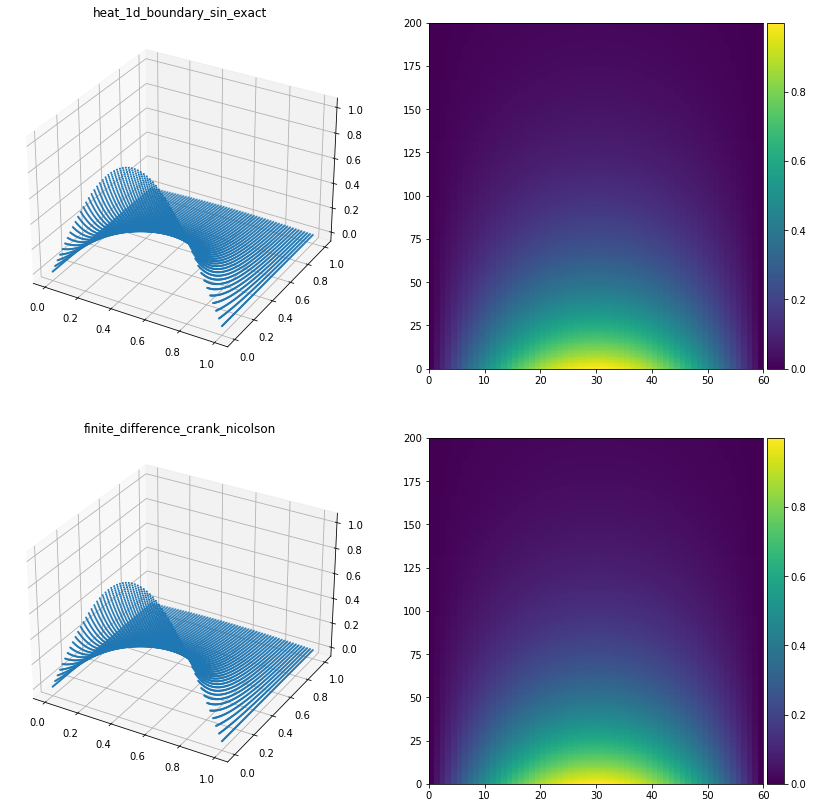

In [1]:
from heat_pinn import *

TIMER_REPEAT_TIMES = 25

# Generate constants throughout this app!!
const_params = PinnConstParam()
solve_analytical_and_numerical(const_params)
plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)


# Test 1: Default parameters from DeepXde

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (240, 2)
train_points shape (2780, 2)
train_next_batch shape (3020, 2)


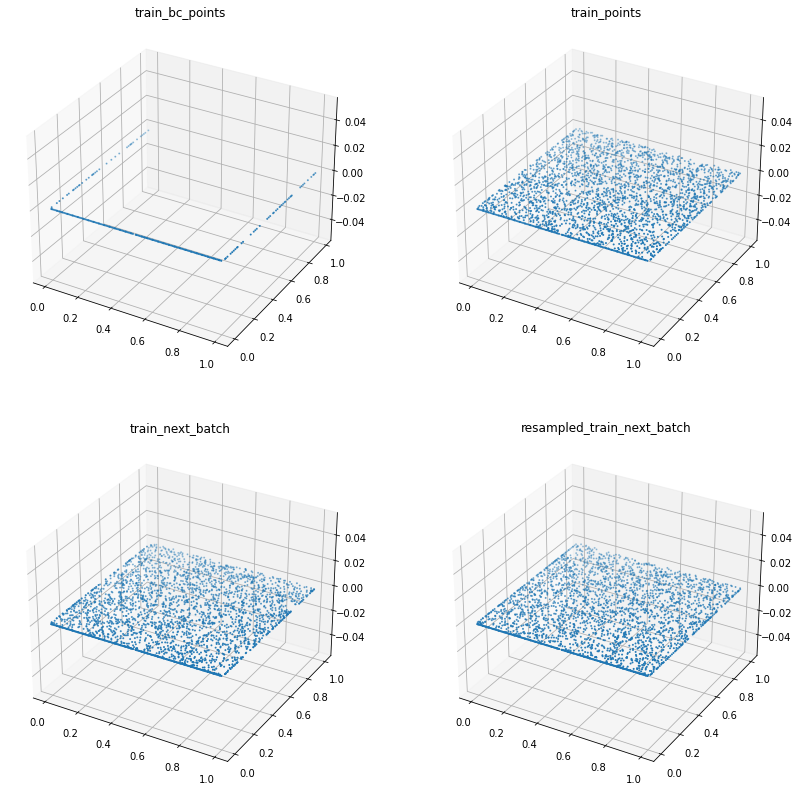

In [2]:
# Create model and plot training data
test_params = PinnTestParam()
geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.031238 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 16:41:38.232921: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-13 16:41:38.233502: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-13 16:41:38.258774: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: un

'compile' took 0.222378 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.81e-03, 1.60e-01, 2.17e-01]    [6.71e-03, 1.60e-01, 2.17e-01]    []  


2021-12-13 16:41:38.427895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-13 16:41:38.450525: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593190000 Hz


1000      [1.12e-03, 3.46e-04, 1.26e-04]    [6.36e-04, 3.46e-04, 1.26e-04]    []  
2000      [2.48e-04, 1.18e-04, 4.28e-05]    [1.47e-04, 1.18e-04, 4.28e-05]    []  
3000      [2.94e-04, 1.04e-04, 1.30e-04]    [2.74e-04, 1.04e-04, 1.30e-04]    []  
4000      [5.72e-05, 3.27e-05, 9.25e-06]    [4.24e-05, 3.27e-05, 9.25e-06]    []  
5000      [3.53e-05, 2.06e-05, 5.14e-06]    [2.39e-05, 2.06e-05, 5.14e-06]    []  
6000      [2.53e-05, 1.31e-05, 3.21e-06]    [1.66e-05, 1.31e-05, 3.21e-06]    []  
7000      [2.80e-05, 1.56e-05, 1.26e-05]    [2.22e-05, 1.56e-05, 1.26e-05]    []  
8000      [2.01e-05, 6.30e-06, 1.43e-06]    [1.23e-05, 6.30e-06, 1.43e-06]    []  
9000      [1.51e-05, 3.56e-06, 1.05e-06]    [1.03e-05, 3.56e-06, 1.05e-06]    []  
10000     [1.31e-05, 2.33e-06, 5.88e-07]    [8.57e-06, 2.33e-06, 5.88e-07]    []  
11000     [1.18e-05, 2.39e-06, 8.44e-07]    [7.88e-06, 2.39e-06, 8.44e-07]    []  
12000     [1.08e-05, 1.36e-06, 3.21e-07]    [6.90e-06, 1.36e-06, 3.21e-07]    []  
1300

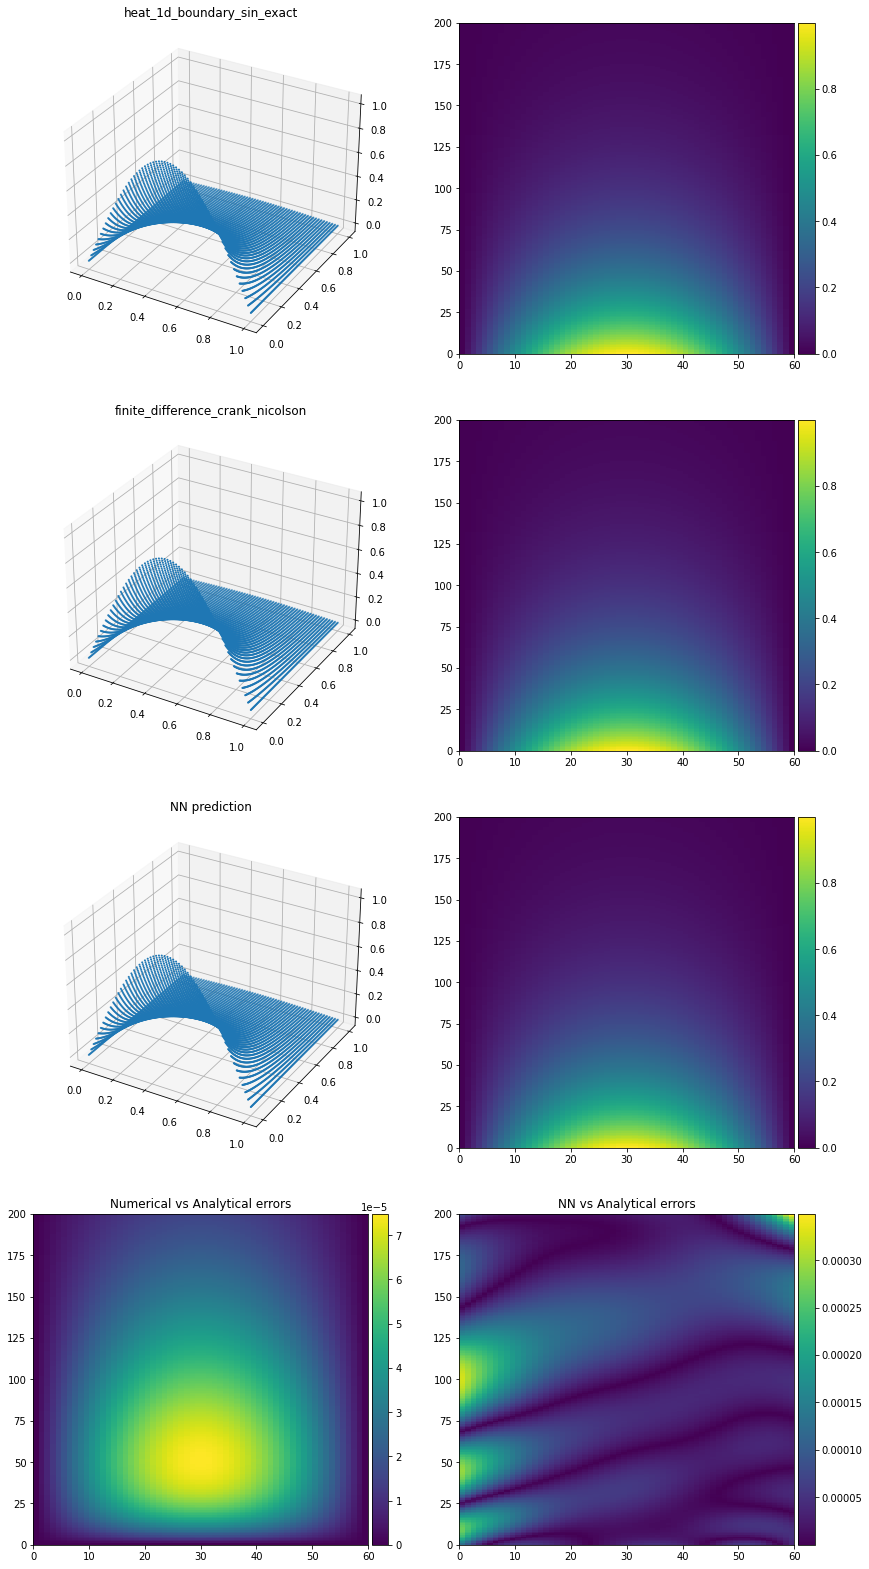

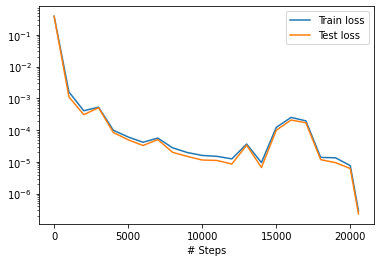

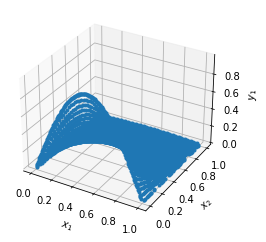

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  5.732550075097705e-05
Mean squared error:  6.266178254453738e-09
Max error:  0.00034864246845245123
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [3]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 2: Reduce hidden layers and size to break solution

In [4]:
test_params = PinnTestParam()
test_params.nn_hidden_layer_num = 1
test_params.nn_hidden_layer_size = 5

geomtime_data, model = create_model(const_params, test_params)

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


In [5]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


Compiling model...
Building feed-forward neural network...
'build' took 0.019386 s

'compile' took 0.139921 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 16:42:47.948727: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.80e-01, 8.52e-02, 3.42e-01]    [2.78e-01, 8.52e-02, 3.42e-01]    []  
1000      [2.03e-02, 4.26e-02, 8.77e-02]    [1.75e-02, 4.26e-02, 8.77e-02]    []  


# Test 3: Reduce boundary points to break solution

In [ ]:
test_params = PinnTestParam()
test_params.d_num_boundary = 3
test_params.d_num_initial = 3

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

In [ ]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)

# Test 4: Reduce domain to break solution

In [ ]:
test_params = PinnTestParam()
test_params.d_num_domain = 50

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

In [ ]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 5: Reduce train data (domain and bc) to break solution

In [ ]:
test_params = PinnTestParam()
test_params.d_num_domain = 5
test_params.d_num_boundary = 10
test_params.d_num_initial = 10

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

In [ ]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)
